In [ ]:
import cv2
import torch

from torchvision.io import read_video
from ultralytics import YOLO

MODEL_FP = "/mnt/arc/levlevi/nba-positions-videos-dataset/scene-filtering/models/fine-tuned/yolo_sceneparse_m_best.pt"
model = YOLO(MODEL_FP)



In [44]:
# read video in to tensors
example_fp = "/mnt/arc/levlevi/nba-positions-videos-dataset/nba-plus-statvu-dataset/clips/17598/period3/17598_period3_2+_77134038.mp4"

In [48]:
import warnings

# run infer on video
results = model(example_fp, verbose=False, stream=True)

In [49]:
# Process results list
conf_scores = []
for i, result in enumerate(results):
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs

    class_pred = list(boxes.cls.to('cpu'))[0]
    conf = list(boxes.conf.to("cpu"))[0]
    if int(class_pred) == 0:
        conf = 1 - conf
    conf_scores.append(conf)

    obb = result.obb  # Oriented boxes object for OBB output
    result.save(
        filename=f"results_test/result_{i}.jpg"
    )

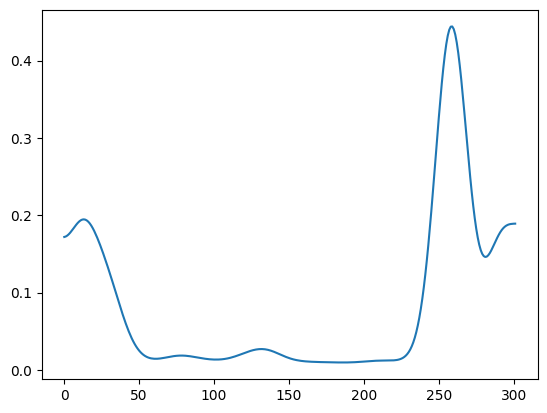

In [43]:
from scipy.ndimage import gaussian_filter1d
from matplotlib import pyplot as plt

smoothed_preds = gaussian_filter1d(conf_scores, sigma=10)
plt.plot(smoothed_preds)
plt.show()